# NVIDIA est elle sensible aux chocs et variations externes?

In [108]:
!pip install yfinance
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prix (en $)')

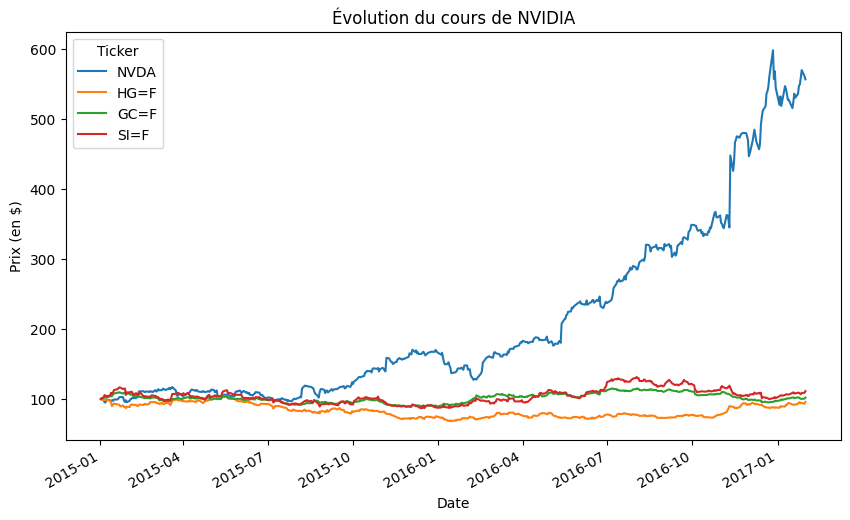

In [109]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

entreprises = ['NVDA', 'AAPL', 'MSFT','ASML']
metaux = ['GC=F', 'SI=F', 'HG=F']
ticker = entreprises+metaux

fig,ax = plt.subplots(figsize=(10, 6))

for ticker in tickers :
    data = yf.download(ticker, start="2015-01-01", end="2017-02-01")
    data2 = yf.download(ticker, start="2015-01-01", end="2026-02-01")

    base_100 = (data["Close"] / data["Close"].iloc[0]) * 100
    base_100.plot(ax=ax, label=ticker)


plt.title("Évolution du cours de NVIDIA")
plt.xlabel("Date")
plt.ylabel("Prix (en $)")


In [110]:
entreprises = ['NVDA', 'AAPL', 'MSFT','ASML']
metaux = ['GC=F', 'SI=F', 'HG=F']
ticker = entreprises+metaux
data2 = yf.download(ticker, start="2015-01-01", end="2026-02-01")
prix_cloture = data2['Close']
rentabilites = np.log(prix_cloture).diff().dropna()
rentabilites = rentabilites.dropna() 
print(rentabilites.head())

[*********************100%***********************]  7 of 7 completed


Ticker          AAPL      ASML      GC=F      HG=F      MSFT      NVDA  \
Date                                                                     
2015-01-05 -0.028576 -0.034191  0.014980 -0.016159 -0.009238 -0.017035   
2015-01-06  0.000094 -0.030025  0.012711  0.003931 -0.014787 -0.030787   
2015-01-07  0.013925  0.005643 -0.007161 -0.002857  0.012625 -0.002609   
2015-01-08  0.037702  0.020714 -0.001819  0.003926  0.028994  0.036927   
2015-01-09  0.001072 -0.012847  0.006270 -0.005896 -0.008441  0.004020   

Ticker          SI=F  
Date                  
2015-01-05  0.027890  
2015-01-06  0.025869  
2015-01-07 -0.005617  
2015-01-08 -0.009677  
2015-01-09  0.002138  


Text(0.5, 25.722222222222214, 'Entreprises')

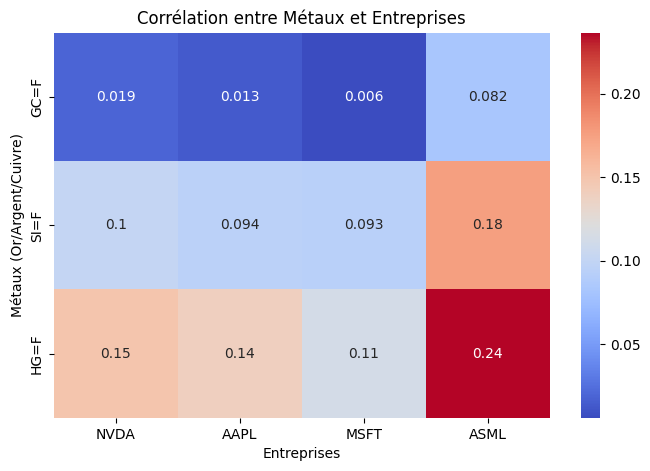

In [111]:
df = rentabilites

numeric_df = df.select_dtypes(include=['float64','int64'])
matrice_globale = numeric_df.corr()
matrice = matrice_globale.loc[metaux, entreprises]


plt.figure(figsize=(8, 5))
sns.heatmap(matrice, annot=True, cmap='coolwarm')

plt.title("Corrélation entre Métaux et Entreprises")
plt.ylabel("Métaux (Or/Argent/Cuivre)") 
plt.xlabel("Entreprises")  



# Creusons plus loin :

## Les postes du bilan :

Malgré les faibles corrélations obtenues, il peut être interressant d'analyser les conséquences de ces fluctuations de prix sur différents postes des états financiers de NVIDIA :

In [112]:
nvda = yf.Ticker("NVDA")
print(nvda.quarterly_income_stmt)

                                                      2025-10-31  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  1.588460e-01   
Normalized EBITDA                                   3.874800e+10   
Net Income From Continuing Operation Net Minori...  3.191000e+10   
Reconciled Depreciation                             7.510000e+08   
Reconciled Cost Of Revenue                          1.515700e+10   
EBITDA                                              3.874800e+10   
EBIT                                                3.799700e+10   
Net Interest Income                                 5.630000e+08   
Interest Expense                                    6.100000e+07   
Interest Income                                     6.240000e+08   
Normalized Income                                   3.191000e+10   
Net Income From Continuing And Discontinued Ope...  3.191000e+10   
Total Expenses                                  

In [113]:
CostOfRevenue = nvda.quarterly_income_stmt.loc["Cost Of Revenue"]
print(CostOfRevenue)

2025-10-31    1.515700e+10
2025-07-31    1.289000e+10
2025-04-30    1.739400e+10
2025-01-31    1.060800e+10
2024-10-31    8.926000e+09
Name: Cost Of Revenue, dtype: float64


pour que l'analyse soit cohérente, il est important de transformer nos rentabilités journalières des métaux en rentabilités trimestrielles.

In [139]:
import pandas as pd
renta_trimestrielles = rentabilites.resample('QE').sum()
print(renta_trimestrielles)

Ticker          AAPL      ASML      GC=F      HG=F      MSFT      NVDA  \
Date                                                                     
2015-03-31  0.133311 -0.061143 -0.002448 -0.032766 -0.132692  0.042815   
2015-06-30  0.012173  0.037712 -0.009853 -0.046000  0.088826 -0.035348   
2015-09-30 -0.124028 -0.168530 -0.048982 -0.112011  0.009061  0.207758   
2015-12-31 -0.042499  0.008939 -0.050751 -0.098492  0.232659  0.294308   
2016-03-31  0.040234  0.123014  0.151871  0.026006  0.002638  0.081530   
2016-06-30 -0.125013 -0.000006  0.065996  0.005942 -0.069383  0.279766   
2016-09-30  0.173060  0.099416 -0.003876  0.003412  0.124583  0.378606   
2016-12-31  0.029365  0.080672 -0.100425  0.128008  0.103140  0.245193   
2017-03-31  0.219738  0.168561  0.081219  0.057948  0.064186  0.021570   
2017-06-30  0.006622 -0.009049 -0.005306  0.019643  0.051276  0.284042   
2017-09-30  0.071699  0.272916  0.032356  0.084678  0.082887  0.213286   
2017-12-31  0.097116  0.015188  0.0191

In [140]:
CostOfRevenue.index = pd.to_datetime(CostOfRevenue.index)
renta_trimestrielles.index = pd.to_datetime(renta_trimestrielles.index)


CostOfRevenue = CostOfRevenue.sort_index()
renta_trimestrielles = renta_trimestrielles.sort_index()

df_nvda = CostOfRevenue.to_frame(name="CostOfRevenue_NVDA")

donnees_finales = pd.merge_asof(
    renta_trimestrielles, 
    df_nvda, 
    left_index=True, 
    right_index=True, 
    direction='nearest'
).dropna()

print(donnees_finales.head())

                AAPL      ASML      GC=F      HG=F      MSFT      NVDA  \
Date                                                                     
2015-03-31  0.133311 -0.061143 -0.002448 -0.032766 -0.132692  0.042815   
2015-06-30  0.012173  0.037712 -0.009853 -0.046000  0.088826 -0.035348   
2015-09-30 -0.124028 -0.168530 -0.048982 -0.112011  0.009061  0.207758   
2015-12-31 -0.042499  0.008939 -0.050751 -0.098492  0.232659  0.294308   
2016-03-31  0.040234  0.123014  0.151871  0.026006  0.002638  0.081530   

                SI=F  CostOfRevenue_NVDA  
Date                                      
2015-03-31  0.052433        8.926000e+09  
2015-06-30 -0.064133        8.926000e+09  
2015-09-30 -0.069080        8.926000e+09  
2015-12-31 -0.052189        8.926000e+09  
2016-03-31  0.115401        8.926000e+09  


Text(0.5, 25.581597222222214, 'Entreprises')

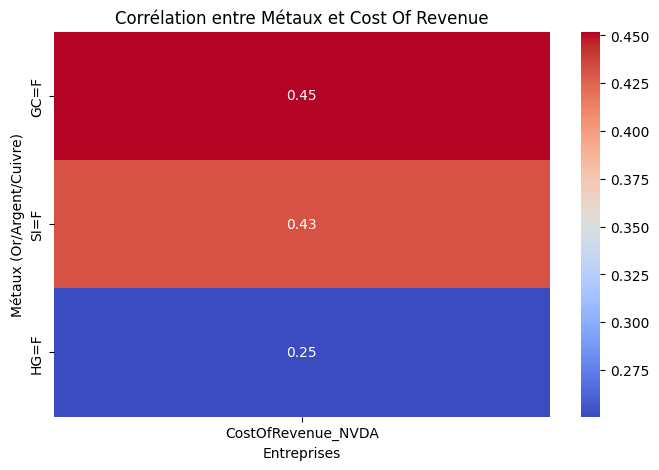

In [126]:
correlation_CDR = donnees_finales.corr()
matrice = correlation_CDR.loc[metaux, ['CostOfRevenue_NVDA']]

plt.figure(figsize=(8, 5))
sns.heatmap(matrice, annot=True, cmap='coolwarm')

plt.title("Corrélation entre Métaux et Cost Of Revenue")
plt.ylabel("Métaux (Or/Argent/Cuivre)") 
plt.xlabel("Entreprises")  


Nous pouvons également étudier la corrélation entre la marge brut et l'évolution du prix des métaux

In [141]:
GrossProfit = nvda.quarterly_income_stmt.loc["Gross Profit"]
print(GrossProfit)

2025-10-31    4.184900e+10
2025-07-31    3.385300e+10
2025-04-30    2.666800e+10
2025-01-31    2.872300e+10
2024-10-31    2.615600e+10
Name: Gross Profit, dtype: float64


In [149]:

GrossProfit2 = GrossProfit.to_frame(name="Profit_nvda")
GrossProfit2.index = pd.to_datetime(GrossProfit2.index)

donnees_finales = pd.merge_asof(
    donnees_finales.sort_index(), 
    GrossProfit2.sort_index(), 
    left_index=True, 
    right_index=True, 
    direction='nearest')


correlation_CDR2 = donnees_finales.corr()

indicateur_profit = ['Profit_nvda']
matrice2 = correlation_CDR2.loc[metaux, ['Profit_nvda']]

plt.figure(figsize=(8, 5))
sns.heatmap(matrice, annot=True, cmap='coolwarm')

plt.title("Corrélation entre Métaux et Gross Margin")
plt.ylabel("Métaux (Or/Argent/Cuivre)") 
plt.xlabel("Gross Profit")  

KeyError: "None of [Index(['Profit_nvda'], dtype='str')] are in the [columns]"

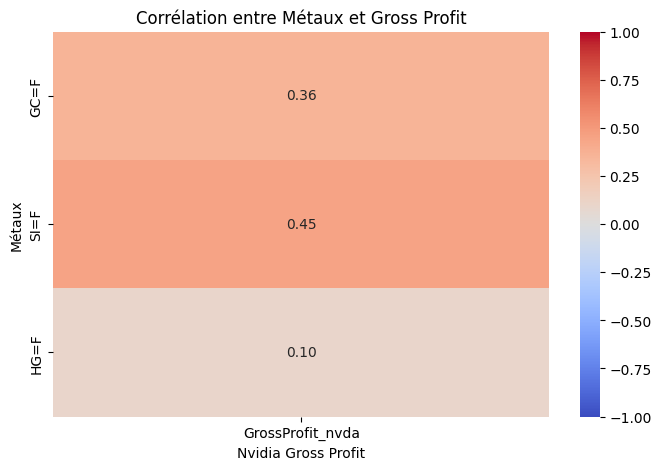

In [ ]:
# On fait le ménage : on ne garde que les colonnes d'origine (Métaux, etc.)
# On supprime toutes les colonnes qui contiennent "GrossProfit" pour repartir à zéro
cols_a_garder = [c for c in donnees_finales.columns if "GrossProfit" not in c]
donnees_finales = donnees_finales[cols_a_garder]


GrossProfit2 = GrossProfit.to_frame(name="GrossProfit_nvda")
GrossProfit2.index = pd.to_datetime(GrossProfit2.index)


donnees_finales = pd.merge_asof(
    donnees_finales.sort_index(), 
    GrossProfit2.sort_index(), 
    left_index=True, 
    right_index=True, 
    direction='nearest')


correlation_CDR2 = donnees_finales.corr()
metaux = ['GC=F', 'SI=F', 'HG=F']
matrice2 = correlation_CDR2.loc[metaux, ['GrossProfit_nvda']]


plt.figure(figsize=(8, 5))
sns.heatmap(matrice2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.title("Corrélation entre Métaux et Gross Profit")
plt.ylabel("Métaux") 
plt.xlabel("Nvidia Gross Profit")
plt.show()